# Armageddon - The Hazard of Small Asteroids [Ceres]

This package solve the system of differential equations describing meteoroid entry and compute the burst altitude, burst energy and horizontal path length from the entry point. Also, it determines the predicted extent of airblast damage on the ground and the postcodes and population affected.


## Preliminary
- - -
1. Download the package ***acs-armageddon-Ceres***:<br />

    &emsp; - **Method 1**:<br />
    ```
    git clone https://github.com/ese-msc-2022/acs-armageddon-Ceres.git
    ```

    &emsp; - **Method 2**:<br /> 

    &emsp; &nbsp; Directly download ZIP from Github https://github.com/ese-msc-2022/acs-armageddon-Ceres

<br>

2. Install packages:<br />
```
    pip install -r requirements.txt
    pip install -e .
```

3. Testing<br />
&emsp; - **Open a Terminal**:<br />
```
    python download_data.py
```
&emsp; - **Locate the location of the target package**:<br />
```
    cd $PATH OF THE PACKAGE$
```
&emsp; - **Run the tests**:<br />
```
    pytest tests/
```

### Import Module

In [1]:
import armageddon as am

### solve_atmospheric_entry

Solve the system of differential equations for a given impact scenario

#### Parameters
- radius: *float*
    - The radius of the asteroid in meters<br><br>
- velocity: *float*
    - The entery speed of the asteroid in meters/second<br><br>
- density: *float*
    - The density of the asteroid in kg/m^3<br><br>
- strength: *float*
    - The strength of the asteroid (i.e. the maximum pressure it can
    take before fragmenting) in N/m^2<br><br>
- angle: *float*
    - The initial trajectory angle of the asteroid to the horizontal
    By default, input is in degrees. If 'radians' is set to True, the
    input should be in radians<br><br>
- init_altitude: *float, optional*
    - Initial altitude in m<br><br>
- dt: *float, optional*
    - The output timestep, in s<br><br>
- t_max: *float, optional*
    - The maximal timestep, in s<br><br>
- radians: *logical, optional*
    - Whether angles should be given in degrees or radians. Default=False
    Angles returned in the dataframe will have the same units as the
    input<br><br>

In [2]:
planet = am.Planet(atmos_func='tabular')

result = planet.solve_atmospheric_entry(radius=35, angle=45,init_altitude=10e3,
                                       strength=1e3, density=3000,
                                       velocity=19e3)

result

,velocity,mass,angle,altitude,distance,radius,time
0,19000.000000,5.387831e+08,45.000000,10000.000000,0.000000,35.000000,0.00
1,18962.167625,5.348928e+08,44.994905,9328.873545,670.169393,46.653105,0.05
2,18893.348904,5.279359e+08,44.989734,8659.655228,1338.623259,58.758565,0.10
3,18779.101414,5.166624e+08,44.984456,7993.684822,2004.023781,71.289841,0.15
4,18600.475348,4.996661e+08,44.979031,7332.888664,2664.446369,84.214776,0.20
...,...,...,...,...,...,...,...
59,346.942764,8.858044e+07,45.931405,47.203162,9956.763282,262.239968,2.95
60,338.544548,8.857778e+07,45.986845,34.885431,9968.675388,262.594086,3.00
61,330.528444,8.857530e+07,46.043656,22.851223,9980.290539,262.939927,3.05
62,322.870059,8.857299e+07,46.101834,11.087521,9991.621845,263.277859,3.10


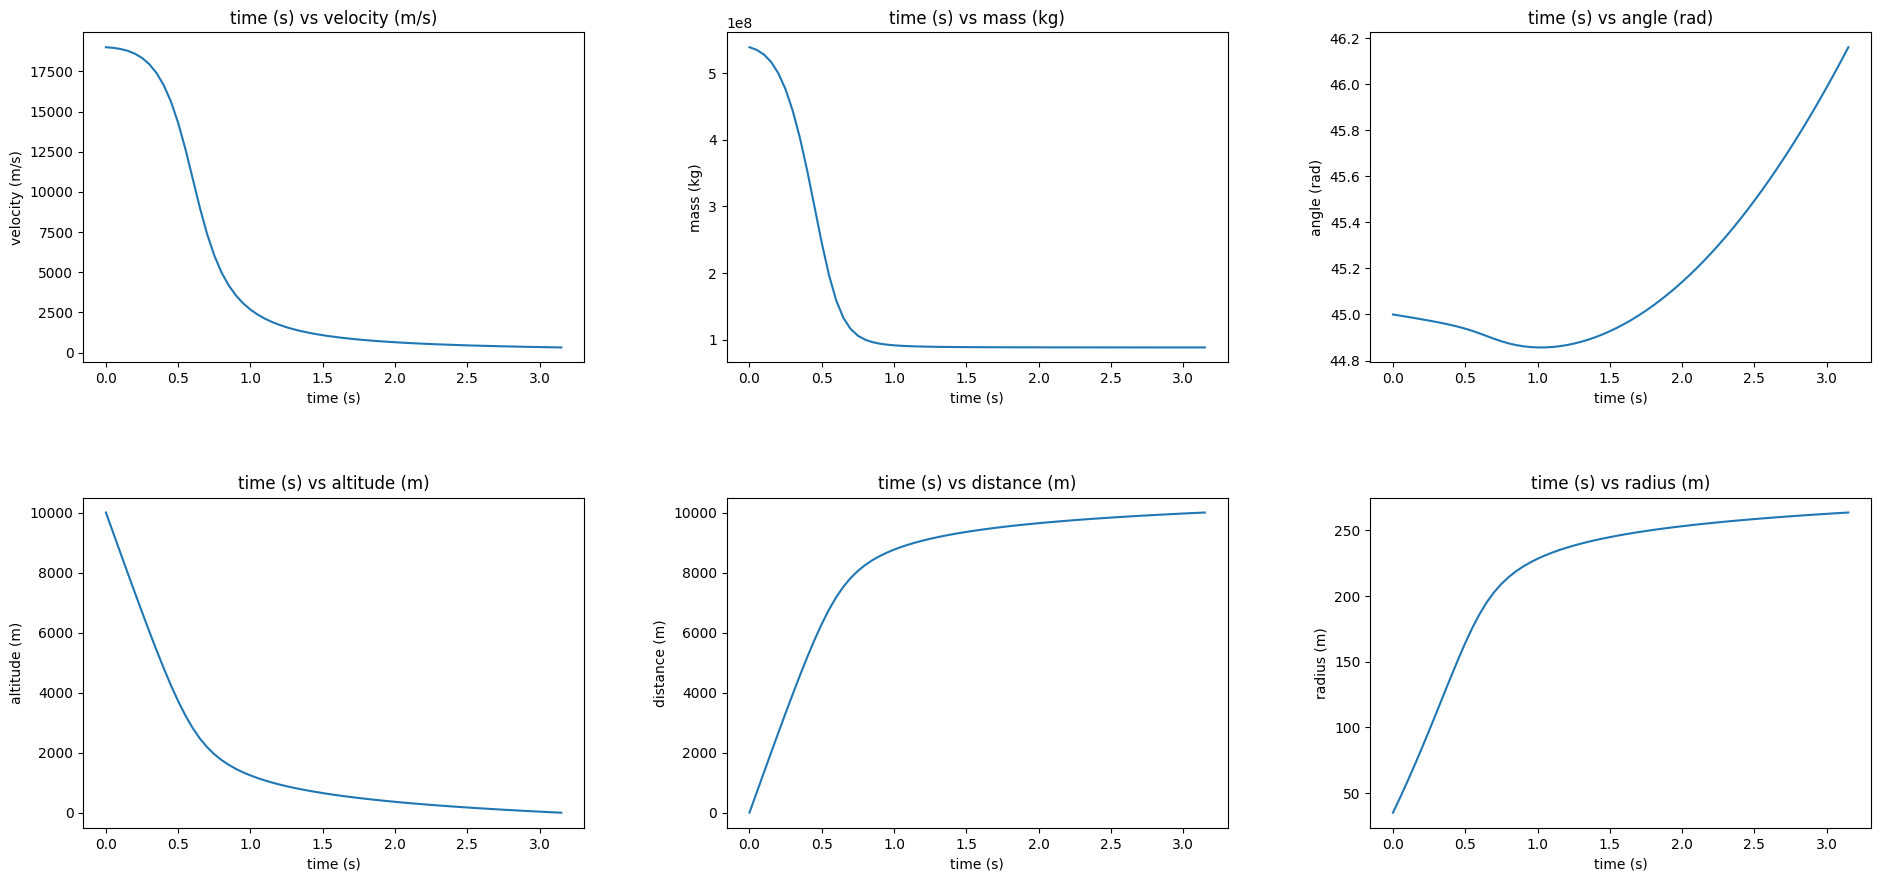

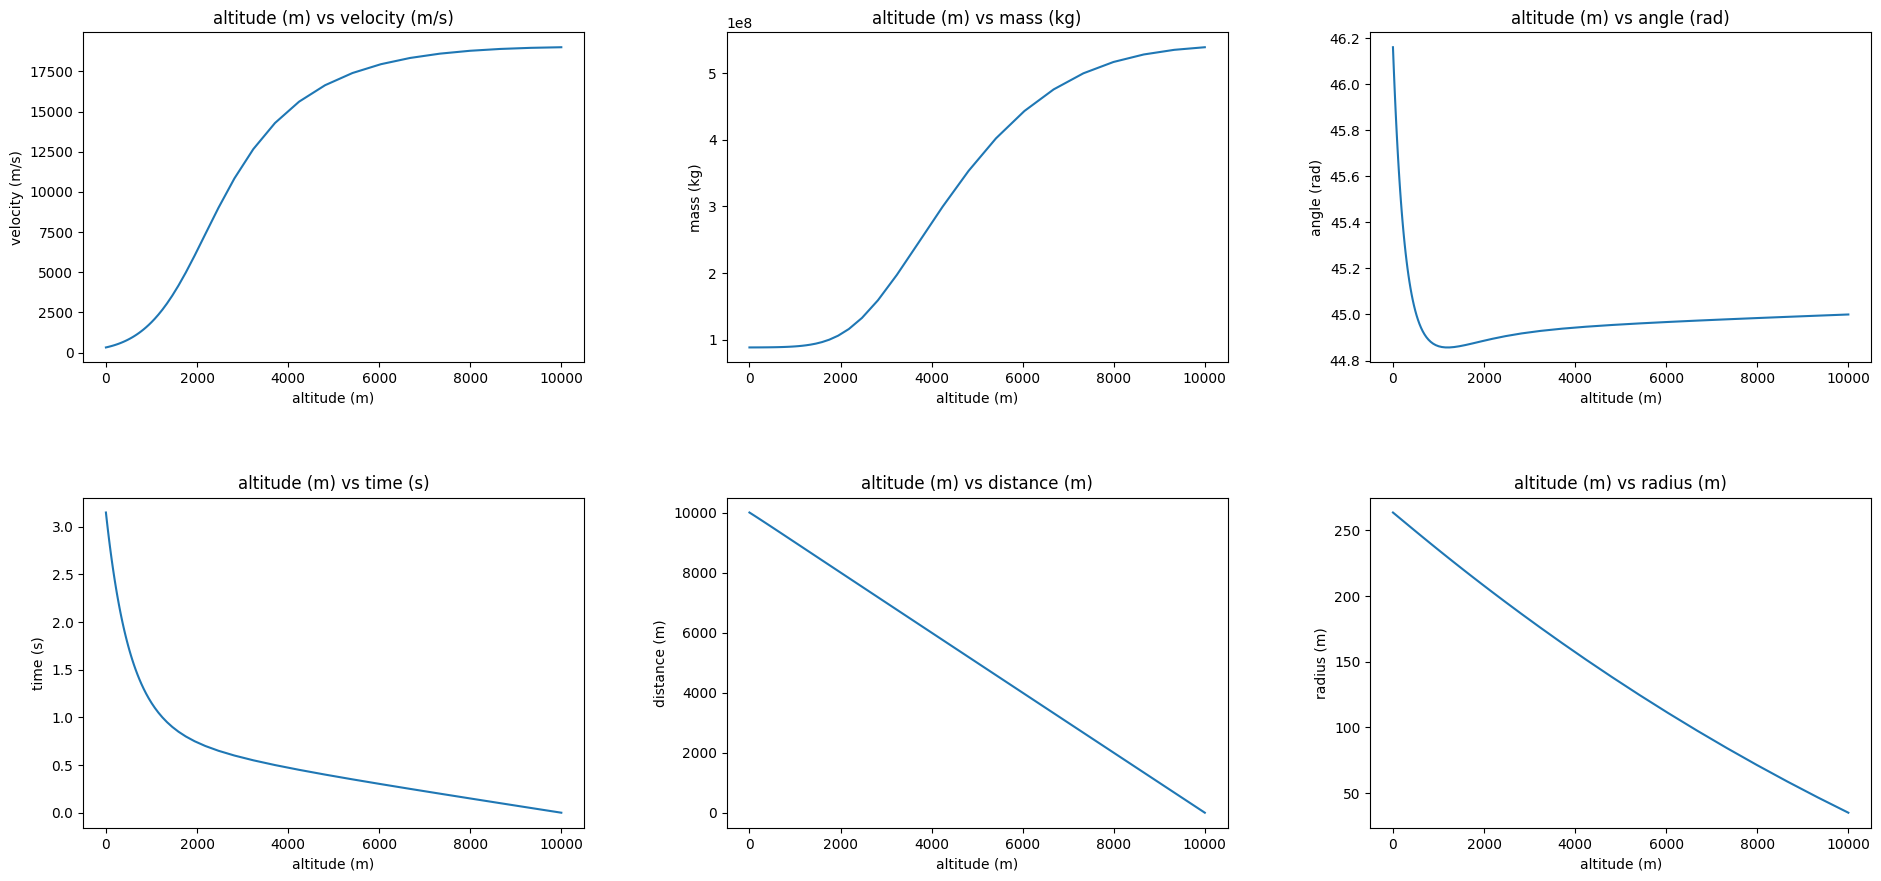

In [3]:
planet.plotting(result)

In [4]:
result_dedz = planet.calculate_energy(result)
result_dedz

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,19000.000000,5.387831e+08,45.000000,10000.000000,0.000000,35.000000,0.00,386.864960
1,18962.167625,5.348928e+08,44.994905,9328.873545,670.169393,46.653105,0.05,539.792172
2,18893.348904,5.279359e+08,44.989734,8659.655228,1338.623259,58.758565,0.10,907.228353
3,18779.101414,5.166624e+08,44.984456,7993.684822,2004.023781,71.289841,0.15,1405.325086
4,18600.475348,4.996661e+08,44.979031,7332.888664,2664.446369,84.214776,0.20,2039.921685
...,...,...,...,...,...,...,...,...
59,346.942764,8.858044e+07,45.931405,47.203162,9956.763282,262.239968,2.95,5.071863
60,338.544548,8.857778e+07,45.986845,34.885431,9968.675388,262.594086,3.00,4.833962
61,330.528444,8.857530e+07,46.043656,22.851223,9980.290539,262.939927,3.05,4.611451
62,322.870059,8.857299e+07,46.101834,11.087521,9991.621845,263.277859,3.10,4.403056


In [5]:
outcome = planet.analyse_outcome(result_dedz)
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 5180.78524170338,
 'burst_altitude': 4241.464397644265,
 'burst_distance': 5756.907451545796,
 'burst_energy': 14516.354931930628}

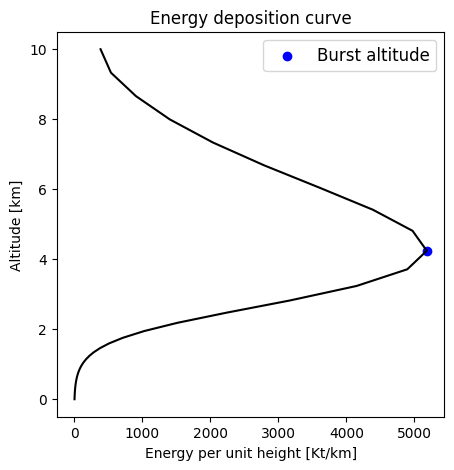

In [6]:
planet.plot_energy_curve(result_dedz, outcome)

### haversine

Calculate the haversine distance between two poins (lat, lon)
on earth with radius 6371 km.

#### Parameters

- lat1: *float*
    - latitude value from first point.<br><br>
- lon1: *float*
    - longitude value from first point.<br><br>
- lat2: *float*
    - latitude value from second point.<br><br>
- lon2: *float*
    - longitude value from second point.<br><br>

In [7]:
am.locator.haversine(10, 12, 31.321, 12.987)

2372973.2601616434

### great_circle_distance

Calculate the great circle distance (in metres) between pairs of
points specified as latitude and longitude on a spherical Earth
(with radius 6371 km).

#### Parameters

- latlon1: *arraylike*
    - latitudes and longitudes of first point (as [n, 2] array for n points)<br><br>
- latlon2: *arraylike*
    - latitudes and longitudes of second point (as [m, 2] array for m points)

In [8]:
am.locator.great_circle_distance([[54.0, 0.0], [55, 0.0]], [55, 1.0])

array([[128580.53670808],
       [ 63778.24657475]])

## PostcodeLocator(object)
Class to interact with a postcode database file.
<br><br>
### get_postcodes_by_radius
Return (unit or sector) postcodes within specific distances of
input location.

- X: *array like*
    - Latitude-longitude pair of centre location<br><br>
- radii: *arraylike*
    - array of radial distances from X<br><br>
- sector: *bool, optional*
    - if true return postcode sectors, otherwise postcode units<br><br>

In [9]:
locator = am.PostcodeLocator()
locator.get_postcodes_by_radius((51.4981, -0.1773), [0.13e3])

[['SW7 2AZ', 'SW7 2BT', 'SW7 2BU', 'SW7 2DD', 'SW7 5HF', 'SW7 5HG', 'SW7 5HQ']]

### get_population_of_postcode
Returns populations of a list of postcode units or sectors.

#### Parameters
- postcodes: *list of lists*
    - list of postcode units or postcode sectors<br><br>
- sector: *bool, optional*
    - if true return populations for postcode sectors,
    otherwise returns populations for postcode units


In [10]:
locator.get_population_of_postcode([['SW7 2AZ', 'SW7 2BT',
                                    'SW7 2BU', 'SW7 2DD']])

[[18.71311475409836, 18.71311475409836, 18.71311475409836, 18.71311475409836]]

In [11]:
locator.get_population_of_postcode([['SW7  2']], True)

[[2283]]

### p
Calculate the pressure(p) in this wave.

#### Parameters

- r: *arraylike, float*
    - horizontal range (meter)<br><br>
- Energy: *float*
    - burst energy kiloton of TNT<br><br>
- burst_altitude: *float*
    - burst altitude, in meter<br><br>
- p_threshold: *float*
    - the target pressure that wish to find r for damage zone

In [12]:
am.damage.p(1e-6, 6000, 9000, 27e3)

20145.2535399684

### level_decision
return root to help damage level decision

#### Parameters

- min, max: *float*
    - the initial interval<br><br>
- Energy: *float*
   -  burst energy kiloton of TNT<br><br>
- burst_altitude: *float*
    - burst altitude, in meter<br><br>
- p_threshold: *float*
    - the target pressure that wish to find r for damage zone<br><br>
- stopping_tolerance: *float*
    - a value for stopping loop<br><br>
- max_iter: *int*
    - the maximum number of iterations allowed

In [13]:
am.damage.level_dicision(min=1e-6, \
              max=2**15+1e-6, \
              Energy=7e3, \
              burst_altitude=8e3, \
              p_threshold=1e3, \
              stopping_tolerance=1e-6, \
              max_iter=100)

115971.3167305456

### damage_zones
Calculate the latitude and longitude of the surface zero location and the
list of airblast damage radii (m) for a given impact scenario.

#### Parameters

- coutcome: *dict*
    - the outcome dictionary from an impact scenario<br><br>
- lat: *float*
    - latitude of the meteoroid entry point (degrees)<br><br>
- lon: *float*
    - longitude of the meteoroid entry point (degrees)<br><br>
- bearing: *float*
    - Bearing (azimuth) relative to north of meteoroid trajectory (degrees)<br><br>
- pressures: *float, arraylike*
    - List of threshold pressures to define airblast damage levels

In [14]:
import numpy as np
outcome = {'burst_altitude': 8e3, 'burst_energy': 7e3,\
    'burst_distance': 90e3, 'burst_peak_dedz': 1e3,\
    'outcome': 'Airburst'}
result = am.damage.damage_zones(outcome, 52.79, -2.95, 135, \
                      pressures=[1e3, 3.5e3, 27e3, 43e3])
np.allclose([result[0], result[1]],\
            [52.21396905216966, -2.015908861677074])

True

### plot_circle
Plot a circle on a map (creating a new folium map instance if necessary).

#### Parameters

- lat: *float*
    - latitude of circle to plot (degrees)<br><br>
- lon: *float*
    - longitude of circle to plot (degrees)<br><br>
- radius: *float*
    - radius of circle to plot (m)<br><br>
- map: *folium.Map*
    - existing map object

In [15]:
import folium

res = am.mapping.plot_circle(52.79, -2.95, 1e3, map=None)
isinstance(res, folium.Map)

True

### plot_results
plot_results()
Plots a map, with the entry point, the blast point and the
different levels. Additionaly postcodes, popuation size can
be passed to the function. If this is done, it is also
necessary to specify whether those are in the sectors
format. The file size can get quite bug with a lot of
affected postcodes. That why the map is not plotted
in this example.

#### Parameters
- lat_entry: *float*
    - latitude of entry point (degrees)<br><br>
- lon_entry: *float*
    - longitude of entry point (degrees)<br><br>
- lat_blast: *float*
    - latitude of blast point (degrees)<br><br>
- lon_blast: *float*
    - longitude of blast point (degrees)<br><br>
- radii: *float*
    - diffrent radii for every level<br><br>
- postcodes: *list of lists, optional*
    - effected postcodes for every level<br><br>
- pop_size: *list of lists, optional*
    - effected population for every postcode in every level<br><br>
- sector: *boolean, optional*
    - whether it is the sector format

In [16]:
lat_entry = 52.655394701839896
lon_entry = -1.3030671874328144
lat_blast = 53.64040971412841
lon_blast = -1.2523687602455351

radii = [37115.469444321236, 11994.891298340393, 4654.807146118714, 2206.0544987188114]
res = am.mapping.plot_results(lat_entry, lon_entry, lat_blast, lon_blast, radii)

isinstance(res, folium.Map)

True